In [2]:
import pandas as pd
import matplotlib
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
data = None
for i in range(0,6):
    df=pd.read_csv("Spark_Data/data/flight-data/csv/201"+str(i)+"-summary.csv")
    df["year"]=int("201"+str(i))
    print(len(df))
    if data is None:
        data=df
    else:
        data=pd.concat([data, df])

255
255
245
250
241
256


In [4]:
len(data)

1502

In [5]:
#Sum all 5 years
data_by_dest=data.groupby(["DEST_COUNTRY_NAME"]).aggregate(sum)
data_by_dest=data_by_dest.sort_values("count",ascending=False).reset_index()
print("Top 10 Destinations based on total count from 2010 to 2015")
data_by_dest[["DEST_COUNTRY_NAME","count"]].head(10)

Top 10 Destinations based on total count from 2010 to 2015


,DEST_COUNTRY_NAME,count
0,United States,2348280
1,Canada,49052
2,Mexico,38075
3,United Kingdom,10946
4,Japan,9205
5,Germany,8501
6,Dominican Republic,6858
7,Brazil,5635
8,The Bahamas,5459
9,France,5206


top 20 Dist. from US (not including internal flights)


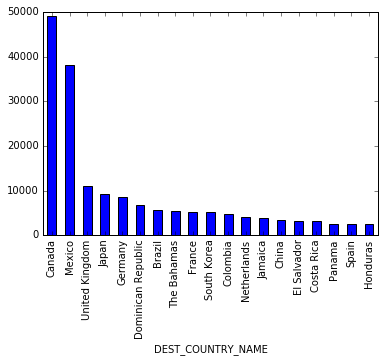

In [6]:
data_by_dest.set_index("DEST_COUNTRY_NAME",inplace=True)
print("top 20 Dist. from US (not including internal flights)")
data_by_dest['count'][1:20].plot(kind="bar")

In [7]:
data_by_origin=data.groupby(["ORIGIN_COUNTRY_NAME"]).aggregate(sum)
data_by_origin=data_by_origin.sort_values("count",ascending=False).reset_index()
print("Top 10 Origins")
data_by_origin[["ORIGIN_COUNTRY_NAME","count"]].head(10)

Top 10 Origins


,ORIGIN_COUNTRY_NAME,count
0,United States,2352430
1,Canada,49695
2,Mexico,38225
3,United Kingdom,10358
4,Japan,8643
5,Germany,8380
6,Dominican Republic,7194
7,The Bahamas,5775
8,France,5290
9,Colombia,4981


top 20 Origins to US


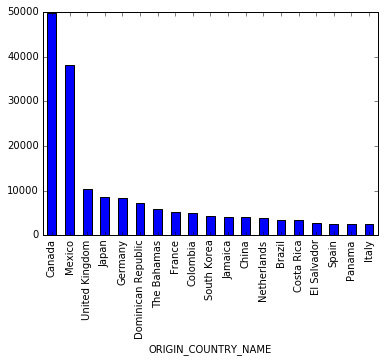

In [8]:
data_by_origin.set_index("ORIGIN_COUNTRY_NAME",inplace=True)
print("top 20 Origins to US")
data_by_origin['count'][1:20].plot(kind="bar")

In [9]:
data["ORIGIN_DEST"]=data["ORIGIN_COUNTRY_NAME"] + " -> " + data["DEST_COUNTRY_NAME"]
data_by_origin_dest=data.groupby(["ORIGIN_DEST"]).aggregate(sum)
data_by_origin_dest=data_by_origin_dest.sort_values("count",ascending=False).reset_index()
print("Top 10 Origin -> Dest")
data_by_origin_dest[["ORIGIN_DEST","count"]].head(10)

Top 10 Origin -> Dest


,ORIGIN_DEST,count
0,United States -> United States,2119795
1,Canada -> United States,49695
2,United States -> Canada,49052
3,Mexico -> United States,38225
4,United States -> Mexico,38075
5,United States -> United Kingdom,10946
6,United Kingdom -> United States,10358
7,United States -> Japan,9205
8,Japan -> United States,8643
9,United States -> Germany,8501


top 20 International Source -> Destination (without US)


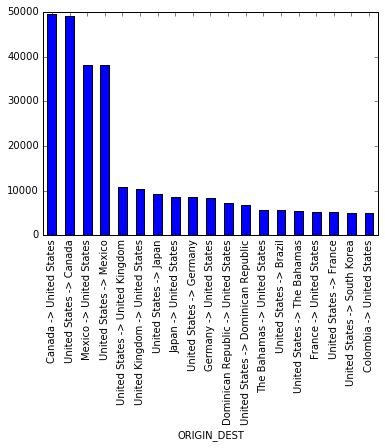

In [10]:
data_by_origin_dest.set_index("ORIGIN_DEST",inplace=True)
print("top 20 International Source -> Destination (without US)")
data_by_origin_dest['count'][1:20].plot(kind="bar")

In [11]:
d_mean=data_by_origin["count"].mean()
d_mean

16759.18831168831

In [12]:
d_std=data_by_origin["count"].std()
d_std

189515.7071778515

In [13]:
#flights per year
data_by_year=data[['year','count']].groupby(["year"]).aggregate(sum)
data_by_year=data_by_year.reset_index().sort_values("year")
print("Total flights per year")
data_by_year[["year","count"]].head(10)

Total flights per year


,year,count
0,2010,422269
1,2011,428426
2,2012,422180
3,2013,417869
4,2014,436855
5,2015,453316


flights line chart from 2010 to 2015


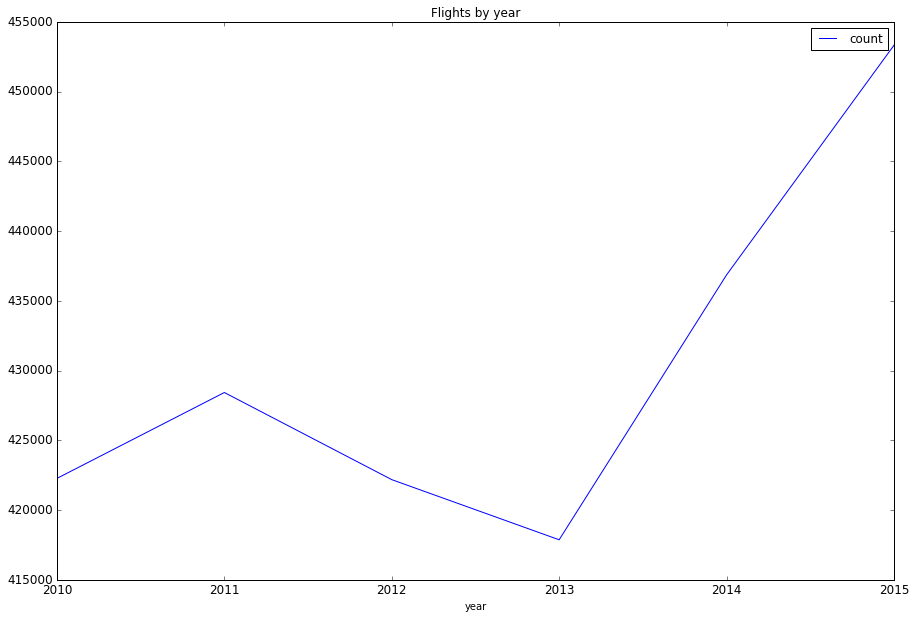

In [14]:
data_by_year["year"]=data_by_year["year"].astype(str)
data_by_year.set_index("year",inplace=True)
print("flights line chart from 2010 to 2015")
data_by_year["count"].plot(kind='line', title ="Flights by year", figsize=(15, 10), legend=True, fontsize=12)

In [15]:
#Calcuate flights from US per year
From_US=data[data["DEST_COUNTRY_NAME"]!="United States"]
def calc_year(x,year):
    result= data[(data["year"]==year) & (data["DEST_COUNTRY_NAME"]==x["DEST_COUNTRY_NAME"])]
    return 0 if len(result)==0 else result.iloc[0]["count"]
for i in range(0,6):
    From_US["201"+str(i)]=From_US.apply(calc_year,year=(2010+i),axis=1)
From_US.head(5)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,DEST_COUNTRY_NAME,ORIGIN_COUNTRY_NAME,count,year,ORIGIN_DEST,2010,2011,2012,2013,2014,2015
3,Egypt,United States,24,2010,United States -> Egypt,24,13,13,13,11,15
4,Equatorial Guinea,United States,1,2010,United States -> Equatorial Guinea,1,0,0,1,0,0
7,Costa Rica,United States,477,2010,United States -> Costa Rica,477,494,522,509,529,588
8,Senegal,United States,29,2010,United States -> Senegal,29,29,31,28,35,40
10,Guyana,United States,17,2010,United States -> Guyana,17,26,65,34,52,64


In [16]:
#Calcualte Total and persentage of 2015 from total
From_US["Total"]=From_US["2015"]+From_US["2010"] +From_US["2015"]
From_US["2015_from_total"]=(From_US["2015"]/From_US["Total"])*100
From_US[["DEST_COUNTRY_NAME","ORIGIN_COUNTRY_NAME","Total","2010","2011","2012","2013","2014","2015","2015_from_total"]].head(5)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,DEST_COUNTRY_NAME,ORIGIN_COUNTRY_NAME,Total,2010,2011,2012,2013,2014,2015,2015_from_total
3,Egypt,United States,54,24,13,13,13,11,15,27.777778
4,Equatorial Guinea,United States,1,1,0,0,1,0,0,0.000000
7,Costa Rica,United States,1653,477,494,522,509,529,588,35.571688
8,Senegal,United States,109,29,29,31,28,35,40,36.697248
10,Guyana,United States,145,17,26,65,34,52,64,44.137931


In [17]:
From_US_sorted_by_2015_from_total=From_US.sort_values("2015_from_total",ascending=False)
print("sorted by the persentage of 2015 from total")
From_US_sorted_by_2015_from_total[["DEST_COUNTRY_NAME","ORIGIN_COUNTRY_NAME","Total","2010","2015","2015_from_total"]].head(5)

sorted by the persentage of 2015 from total


,DEST_COUNTRY_NAME,ORIGIN_COUNTRY_NAME,Total,2010,2015,2015_from_total
193,Romania,United States,28,0,14,50.0
194,Indonesia,United States,2,0,1,50.0
195,Papua New Guinea,United States,6,0,3,50.0
180,Tunisia,United States,6,0,3,50.0
104,Croatia,United States,4,0,2,50.0


In [18]:
#ignore countries with total flights less than 50
From_US_sorted_by_2015_from_total= From_US_sorted_by_2015_from_total[From_US_sorted_by_2015_from_total["Total"]>50].drop_duplicates(["DEST_COUNTRY_NAME","ORIGIN_COUNTRY_NAME"])
print("sorted by the persentage of 2015 from total, ignoring countries with total flights less than 50")
From_US_sorted_by_2015_from_total[["DEST_COUNTRY_NAME","ORIGIN_COUNTRY_NAME","Total","2010","2011","2012","2013","2014","2015","2015_from_total"]].head(20)

sorted by the persentage of 2015 from total, ignoring countries with total flights less than 50


,DEST_COUNTRY_NAME,ORIGIN_COUNTRY_NAME,Total,2010,2011,2012,2013,2014,2015,2015_from_total
35,Sint Maarten,United States,711,61,240,243,271,290,325,45.710267
170,Curacao,United States,200,20,106,107,97,74,90,45.000000
55,Norway,United States,271,29,25,31,48,86,121,44.649446
10,Guyana,United States,145,17,26,65,34,52,64,44.137931
220,Nigeria,United States,134,16,31,57,58,49,59,44.029851
254,"Bonaire, Sint Eustatius, and Saba",United States,132,16,50,46,53,62,58,43.939394
109,Qatar,United States,257,41,48,56,71,95,108,42.023346
126,British Virgin Islands,United States,263,49,73,83,101,108,107,40.684411
164,Saudi Arabia,United States,208,42,83,72,86,79,83,39.903846
14,Anguilla,United States,103,21,21,19,22,34,41,39.805825


In [31]:
#the lowest 20 countries 
From_US_sorted_by_2015_from_total[["DEST_COUNTRY_NAME","ORIGIN_COUNTRY_NAME","Total","2010","2011","2012","2013","2014","2015","2015_from_total"]].tail(20)

,DEST_COUNTRY_NAME,ORIGIN_COUNTRY_NAME,Total,2010,2011,2012,2013,2014,2015,2015_from_total
131,India,United States,188,66,73,61,61,61,61,32.446809
109,Jamaica,United States,2065,733,675,617,581,673,666,32.251816
32,Samoa,United States,78,28,25,25,25,24,25,32.051282
220,Jordan,United States,138,50,42,41,74,65,44,31.884058
133,Brazil,United States,2701,995,969,979,912,927,853,31.580896
177,Grenada,United States,171,65,67,51,42,43,53,30.994152
252,Uruguay,United States,140,54,50,53,57,60,43,30.714286
56,Venezuela,United States,957,377,373,389,350,335,290,30.303030
195,Dominica,United States,68,28,25,26,19,25,20,29.411765
175,Paraguay,United States,210,90,85,85,75,90,60,28.571429


stacked bar chart from 2010 to 2015 with top 10 countries having more flights in 2015 than pervious years


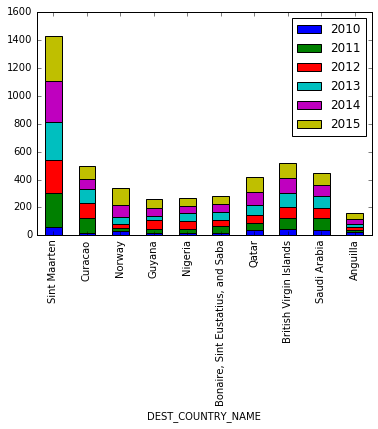

In [20]:
print("stacked bar chart from 2010 to 2015 with top 10 countries having more flights in 2015 than pervious years")
From_US_sorted_by_2015_from_total[["DEST_COUNTRY_NAME","2010","2011","2012","2013","2014","2015"]].set_index(["DEST_COUNTRY_NAME"]).head(10).plot(kind='bar', stacked=True)

lowest 10 countries


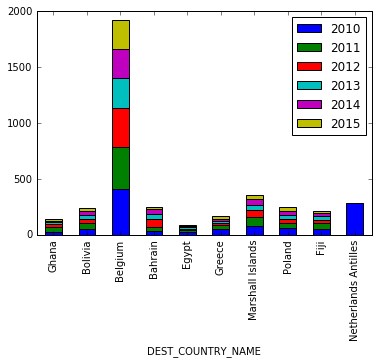

In [21]:
print('lowest 10 countries')
From_US_sorted_by_2015_from_total[["DEST_COUNTRY_NAME","2010","2011","2012","2013","2014","2015"]].set_index(["DEST_COUNTRY_NAME"]).tail(10).plot(kind='bar', stacked=True)

In [22]:
#Calcuate flights To US per year
To_US=data[data["ORIGIN_COUNTRY_NAME"]!="United States"]
def calc_year_to(x,year):
    result= data[(data["year"]==year) & (data["ORIGIN_COUNTRY_NAME"]==x["ORIGIN_COUNTRY_NAME"])]
    return 0 if len(result)==0 else result.iloc[0]["count"]
for i in range(0,6):
    To_US["201"+str(i)]=To_US.apply(calc_year_to,year=(2010+i),axis=1)
To_US.head(5)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,DEST_COUNTRY_NAME,ORIGIN_COUNTRY_NAME,count,year,ORIGIN_DEST,2010,2011,2012,2013,2014,2015
0,United States,Romania,1,2010,Romania -> United States,1,3,0,12,12,15
1,United States,Ireland,264,2010,Ireland -> United States,264,268,252,266,291,344
2,United States,India,69,2010,India -> United States,69,76,62,60,62,62
5,United States,Singapore,25,2010,Singapore -> United States,25,24,25,22,0,1
6,United States,Grenada,54,2010,Grenada -> United States,54,59,46,40,47,62


In [23]:
#Calcualte Total and persentage of 2015 from total
To_US["Total"]=To_US["2015"]+To_US["2010"] +To_US["2015"]
To_US["2015_from_total"]=(To_US["2015"]/To_US["Total"])*100
To_US[["DEST_COUNTRY_NAME","ORIGIN_COUNTRY_NAME","Total","2010","2011","2012","2013","2014","2015","2015_from_total"]].head(5)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,DEST_COUNTRY_NAME,ORIGIN_COUNTRY_NAME,Total,2010,2011,2012,2013,2014,2015,2015_from_total
0,United States,Romania,31,1,3,0,12,12,15,48.387097
1,United States,Ireland,952,264,268,252,266,291,344,36.134454
2,United States,India,193,69,76,62,60,62,62,32.124352
5,United States,Singapore,27,25,24,25,22,0,1,3.703704
6,United States,Grenada,178,54,59,46,40,47,62,34.831461


In [24]:
To_US_sorted_by_2015_from_total=To_US.sort_values("2015_from_total",ascending=False)
print("sorted by the persentage of 2015 from total")
To_US_sorted_by_2015_from_total[["DEST_COUNTRY_NAME","ORIGIN_COUNTRY_NAME","Total","2010","2015","2015_from_total"]].head(5)

sorted by the persentage of 2015 from total


,DEST_COUNTRY_NAME,ORIGIN_COUNTRY_NAME,Total,2010,2015,2015_from_total
13,United States,Paraguay,12,0,6,50.0
239,United States,Montenegro,2,0,1,50.0
0,United States,Croatia,2,0,1,50.0
2,United States,Croatia,2,0,1,50.0
17,United States,Paraguay,12,0,6,50.0


In [25]:
#ignore countries with total flights less than 50
To_US_sorted_by_2015_from_total= To_US_sorted_by_2015_from_total[To_US_sorted_by_2015_from_total["Total"]>50].drop_duplicates(["DEST_COUNTRY_NAME","ORIGIN_COUNTRY_NAME"])
print("sorted by the persentage of 2015 from total, ignoring countries with total flights less than 50")
To_US_sorted_by_2015_from_total[["DEST_COUNTRY_NAME","ORIGIN_COUNTRY_NAME","Total","2010","2011","2012","2013","2014","2015","2015_from_total"]].head(20)

sorted by the persentage of 2015 from total, ignoring countries with total flights less than 50


,DEST_COUNTRY_NAME,ORIGIN_COUNTRY_NAME,Total,2010,2011,2012,2013,2014,2015,2015_from_total
10,United States,Sint Maarten,703,53,223,245,260,290,325,46.230441
185,United States,Curacao,180,14,97,96,89,77,83,46.111111
155,United States,"Bonaire, Sint Eustatius, and Saba",134,16,49,44,54,63,59,44.029851
120,United States,Norway,266,36,33,33,46,87,115,43.233083
172,United States,Guyana,146,20,29,79,52,55,63,43.150685
151,United States,Nigeria,118,18,26,44,49,43,50,42.372881
238,United States,Qatar,258,40,48,56,72,96,109,42.248062
187,United States,South Africa,95,15,21,29,26,32,40,42.105263
51,United States,Suriname,81,13,20,26,21,27,34,41.975309
142,United States,Martinique,106,20,20,17,24,32,43,40.566038


In [30]:
#the lowest 20 countries 
To_US_sorted_by_2015_from_total[["DEST_COUNTRY_NAME","ORIGIN_COUNTRY_NAME","Total","2010","2011","2012","2013","2014","2015","2015_from_total"]].tail(20)

,DEST_COUNTRY_NAME,ORIGIN_COUNTRY_NAME,Total,2010,2011,2012,2013,2014,2015,2015_from_total
128,United States,Germany,4078,1406,1480,1413,1402,1343,1336,32.761157
55,United States,Jamaica,2181,757,695,610,599,714,712,32.645575
177,United States,Taiwan,722,252,231,214,235,240,235,32.548476
189,United States,Switzerland,944,334,319,282,285,300,305,32.309322
31,United States,Senegal,130,46,33,33,32,28,42,32.307692
4,United States,India,193,69,76,62,60,62,62,32.124352
57,United States,Samoa,78,28,25,25,25,25,25,32.051282
145,United States,Argentina,441,159,152,170,140,153,141,31.972789
9,United States,Marshall Islands,122,44,49,30,33,35,39,31.967213
43,United States,Ecuador,945,345,351,321,307,326,300,31.746032


stacked bar chart from 2010 to 2015 with top 10 countries having more flights in 2015 than pervious years


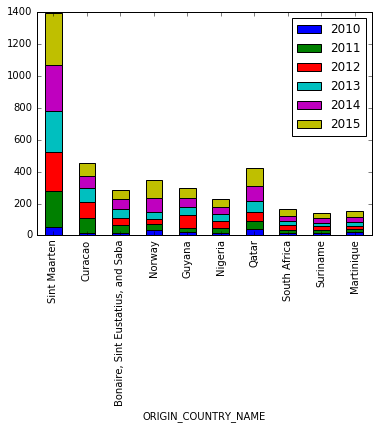

In [28]:
print("stacked bar chart from 2010 to 2015 with top 10 countries having more flights in 2015 than pervious years")
To_US_sorted_by_2015_from_total[["ORIGIN_COUNTRY_NAME","2010","2011","2012","2013","2014","2015"]].set_index(["ORIGIN_COUNTRY_NAME"]).head(10).plot(kind='bar', stacked=True)

lowest 10 countries


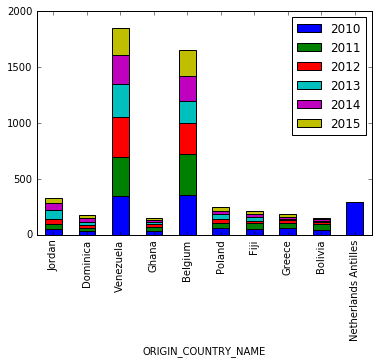

In [29]:
print('lowest 10 countries')
To_US_sorted_by_2015_from_total[["ORIGIN_COUNTRY_NAME","2010","2011","2012","2013","2014","2015"]].set_index(["ORIGIN_COUNTRY_NAME"]).tail(10).plot(kind='bar', stacked=True)